In [1]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], list(range(2,dz+2)))
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], list(range(2,dz+2)))
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

2025-02-05 23:24:18.182505: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 23:24:18.198933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738769058.218857     398 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738769058.224708     398 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 23:24:18.244887: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Default (k=1)


n=2000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=2000:   2%|█▉                                                                                             | 1/50 [04:37<3:47:01, 277.99s/it]

n=2000:   4%|███▊                                                                                           | 2/50 [09:05<3:37:23, 271.73s/it]

n=2000:   6%|█████▋                                                                                         | 3/50 [14:02<3:41:46, 283.12s/it]

n=2000:   8%|███████▌                                                                                       | 4/50 [18:05<3:24:55, 267.30s/it]

n=2000:  10%|█████████▌                                                                                     | 5/50 [22:27<3:19:09, 265.53s/it]

n=2000:  12%|███████████▍                                                                                   | 6/50 [26:20<3:06:39, 254.54s/it]

n=2000:  14%|█████████████▎                                                                                 | 7/50 [30:35<3:02:24, 254.53s/it]

n=2000:  16%|███████████████▏                                                                               | 8/50 [35:28<3:06:51, 266.93s/it]

n=2000:  18%|█████████████████                                                                              | 9/50 [40:17<3:06:58, 273.62s/it]

n=2000:  20%|██████████████████▊                                                                           | 10/50 [44:38<2:59:50, 269.76s/it]

n=2000:  22%|████████████████████▋                                                                         | 11/50 [48:45<2:50:51, 262.86s/it]

n=2000:  24%|██████████████████████▌                                                                       | 12/50 [53:37<2:52:12, 271.92s/it]

n=2000:  26%|████████████████████████▍                                                                     | 13/50 [58:31<2:51:38, 278.34s/it]

n=2000:  28%|█████████████████████████▊                                                                  | 14/50 [1:02:56<2:44:38, 274.41s/it]

n=2000:  30%|███████████████████████████▌                                                                | 15/50 [1:07:18<2:37:51, 270.60s/it]

n=2000:  32%|█████████████████████████████▍                                                              | 16/50 [1:11:14<2:27:24, 260.14s/it]

n=2000:  34%|███████████████████████████████▎                                                            | 17/50 [1:16:02<2:27:44, 268.62s/it]

n=2000:  36%|█████████████████████████████████                                                           | 18/50 [1:20:03<2:18:52, 260.39s/it]

n=2000:  38%|██████████████████████████████████▉                                                         | 19/50 [1:24:04<2:11:26, 254.39s/it]

n=2000:  40%|████████████████████████████████████▊                                                       | 20/50 [1:28:04<2:05:04, 250.14s/it]

n=2000:  42%|██████████████████████████████████████▋                                                     | 21/50 [1:32:08<2:00:02, 248.35s/it]

n=2000:  44%|████████████████████████████████████████▍                                                   | 22/50 [1:36:27<1:57:26, 251.65s/it]

n=2000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [1:40:47<1:54:22, 254.18s/it]

n=2000:  48%|████████████████████████████████████████████▏                                               | 24/50 [1:45:20<1:52:36, 259.87s/it]

n=2000:  50%|██████████████████████████████████████████████                                              | 25/50 [1:49:47<1:49:03, 261.73s/it]

n=2000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [1:53:34<1:40:31, 251.33s/it]

n=2000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [1:58:09<1:39:06, 258.55s/it]

n=2000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [2:03:10<1:39:25, 271.18s/it]

n=2000:  58%|█████████████████████████████████████████████████████▎                                      | 29/50 [2:07:45<1:35:23, 272.55s/it]

n=2000:  60%|███████████████████████████████████████████████████████▏                                    | 30/50 [2:11:55<1:28:30, 265.53s/it]

n=2000:  62%|█████████████████████████████████████████████████████████                                   | 31/50 [2:16:06<1:22:46, 261.41s/it]

n=2000:  64%|██████████████████████████████████████████████████████████▉                                 | 32/50 [2:20:20<1:17:42, 259.03s/it]

n=2000:  66%|████████████████████████████████████████████████████████████▋                               | 33/50 [2:24:10<1:10:57, 250.47s/it]

n=2000:  68%|██████████████████████████████████████████████████████████████▌                             | 34/50 [2:28:33<1:07:43, 253.99s/it]

n=2000:  70%|████████████████████████████████████████████████████████████████▍                           | 35/50 [2:32:51<1:03:52, 255.47s/it]

n=2000:  72%|███████████████████████████████████████████████████████████████████▋                          | 36/50 [2:37:03<59:21, 254.37s/it]

n=2000:  74%|█████████████████████████████████████████████████████████████████████▌                        | 37/50 [2:41:36<56:17, 259.77s/it]

n=2000:  76%|███████████████████████████████████████████████████████████████████████▍                      | 38/50 [2:46:19<53:21, 266.76s/it]

n=2000:  78%|█████████████████████████████████████████████████████████████████████████▎                    | 39/50 [2:51:00<49:42, 271.16s/it]

n=2000:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [2:55:28<45:02, 270.29s/it]

n=2000:  82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [2:59:36<39:30, 263.38s/it]

n=2000:  84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [3:03:23<33:40, 252.57s/it]

n=2000:  86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [3:07:37<29:30, 252.93s/it]

n=2000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [3:12:10<25:54, 259.12s/it]

n=2000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [3:16:59<22:19, 267.85s/it]

n=2000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [3:21:30<17:55, 268.98s/it]

n=2000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [3:26:14<13:40, 273.35s/it]

n=2000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [3:30:02<08:39, 259.94s/it]

n=2000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [3:34:23<04:20, 260.00s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [3:39:09<00:00, 267.82s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [3:39:09<00:00, 262.98s/it]

n=4000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=4000:   2%|█▉                                                                                            | 1/50 [13:02<10:38:57, 782.40s/it]

n=4000:   4%|███▊                                                                                           | 2/50 [23:04<9:00:51, 676.08s/it]

n=4000:   6%|█████▋                                                                                         | 3/50 [32:51<8:17:46, 635.46s/it]

n=4000:   8%|███████▌                                                                                       | 4/50 [44:21<8:23:38, 656.92s/it]

n=4000:  10%|█████████▌                                                                                     | 5/50 [53:37<7:45:39, 620.87s/it]

n=4000:  12%|███████████▏                                                                                 | 6/50 [1:03:19<7:25:35, 607.62s/it]

n=4000:  14%|█████████████                                                                                | 7/50 [1:13:56<7:22:21, 617.23s/it]

n=4000:  16%|██████████████▉                                                                              | 8/50 [1:26:01<7:35:56, 651.34s/it]

n=4000:  18%|████████████████▋                                                                            | 9/50 [1:37:08<7:28:33, 656.42s/it]

n=4000:  20%|██████████████████▍                                                                         | 10/50 [1:47:42<7:12:58, 649.47s/it]

n=4000:  22%|████████████████████▏                                                                       | 11/50 [1:59:35<7:14:49, 668.97s/it]

n=4000:  24%|██████████████████████                                                                      | 12/50 [2:11:04<7:07:22, 674.80s/it]

n=4000:  26%|███████████████████████▉                                                                    | 13/50 [2:20:26<6:35:05, 640.69s/it]

n=4000:  28%|█████████████████████████▊                                                                  | 14/50 [2:32:26<6:38:52, 664.80s/it]

n=4000:  30%|███████████████████████████▌                                                                | 15/50 [2:45:04<6:44:06, 692.75s/it]

n=4000:  32%|█████████████████████████████▍                                                              | 16/50 [2:58:59<6:56:55, 735.74s/it]

n=4000:  34%|███████████████████████████████▎                                                            | 17/50 [3:10:13<6:34:27, 717.19s/it]

n=4000:  36%|█████████████████████████████████                                                           | 18/50 [3:23:56<6:39:25, 748.91s/it]

n=4000:  38%|██████████████████████████████████▉                                                         | 19/50 [3:35:38<6:19:38, 734.78s/it]

n=4000:  40%|████████████████████████████████████▊                                                       | 20/50 [3:48:38<6:14:09, 748.33s/it]

n=4000:  42%|██████████████████████████████████████▋                                                     | 21/50 [3:59:41<5:49:15, 722.60s/it]

n=4000:  44%|████████████████████████████████████████▍                                                   | 22/50 [4:11:30<5:35:19, 718.54s/it]

n=4000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [4:20:48<5:01:41, 670.44s/it]

n=4000:  48%|████████████████████████████████████████████▏                                               | 24/50 [4:32:09<4:51:58, 673.77s/it]

n=4000:  50%|██████████████████████████████████████████████                                              | 25/50 [4:44:20<4:47:51, 690.84s/it]

n=4000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [4:56:06<4:38:11, 695.49s/it]

n=4000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [5:06:34<4:18:48, 675.15s/it]

n=4000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [5:16:54<4:01:30, 658.65s/it]

n=4000:  58%|█████████████████████████████████████████████████████▎                                      | 29/50 [5:28:21<3:53:27, 667.04s/it]

n=4000:  60%|███████████████████████████████████████████████████████▏                                    | 30/50 [5:38:35<3:37:05, 651.26s/it]

n=4000:  62%|█████████████████████████████████████████████████████████                                   | 31/50 [5:47:34<3:15:30, 617.39s/it]

n=4000:  64%|██████████████████████████████████████████████████████████▉                                 | 32/50 [6:00:16<3:18:16, 660.92s/it]

n=4000:  66%|████████████████████████████████████████████████████████████▋                               | 33/50 [6:11:13<3:06:52, 659.57s/it]

n=4000:  68%|██████████████████████████████████████████████████████████████▌                             | 34/50 [6:21:30<2:52:29, 646.85s/it]

n=4000:  70%|████████████████████████████████████████████████████████████████▍                           | 35/50 [6:32:31<2:42:48, 651.21s/it]

n=4000:  72%|██████████████████████████████████████████████████████████████████▏                         | 36/50 [6:44:28<2:36:31, 670.82s/it]

n=4000:  74%|████████████████████████████████████████████████████████████████████                        | 37/50 [6:55:41<2:25:30, 671.54s/it]

n=4000:  76%|█████████████████████████████████████████████████████████████████████▉                      | 38/50 [7:07:27<2:16:22, 681.91s/it]

n=4000:  78%|███████████████████████████████████████████████████████████████████████▊                    | 39/50 [7:17:13<1:59:45, 653.27s/it]

n=4000:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 40/50 [7:29:48<1:53:57, 683.75s/it]

n=4000:  82%|███████████████████████████████████████████████████████████████████████████▍                | 41/50 [7:40:03<1:39:26, 662.93s/it]

n=4000:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 42/50 [7:51:32<1:29:27, 670.92s/it]

n=4000:  86%|███████████████████████████████████████████████████████████████████████████████             | 43/50 [8:01:11<1:15:02, 643.16s/it]

n=4000:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 44/50 [8:09:59<1:00:52, 608.71s/it]

n=4000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [8:19:10<49:16, 591.34s/it]

n=4000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [8:28:20<38:36, 579.08s/it]

n=4000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [8:37:55<28:53, 577.85s/it]

n=4000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [8:47:31<19:14, 577.24s/it]

n=4000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [8:56:55<09:33, 573.37s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [9:08:28<00:00, 609.20s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [9:08:28<00:00, 658.17s/it]

Ensemble (k=1000, p_alpha125)


n=2000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=2000:   2%|█▉                                                                                             | 1/50 [03:23<2:46:03, 203.34s/it]

n=2000:   4%|███▊                                                                                           | 2/50 [07:04<2:50:54, 213.63s/it]

n=2000:   6%|█████▋                                                                                         | 3/50 [09:53<2:31:20, 193.21s/it]

n=2000:   8%|███████▌                                                                                       | 4/50 [12:38<2:19:35, 182.07s/it]

n=2000:  10%|█████████▌                                                                                     | 5/50 [15:23<2:11:55, 175.90s/it]

n=2000:  12%|███████████▍                                                                                   | 6/50 [18:06<2:05:49, 171.57s/it]

n=2000:  14%|█████████████▎                                                                                 | 7/50 [20:56<2:02:43, 171.23s/it]

n=2000:  16%|███████████████▏                                                                               | 8/50 [23:35<1:57:09, 167.36s/it]

n=2000:  18%|█████████████████                                                                              | 9/50 [26:31<1:56:11, 170.03s/it]

n=2000:  20%|██████████████████▊                                                                           | 10/50 [29:20<1:53:11, 169.79s/it]

n=2000:  22%|████████████████████▋                                                                         | 11/50 [32:16<1:51:28, 171.51s/it]

n=2000:  24%|██████████████████████▌                                                                       | 12/50 [35:12<1:49:30, 172.91s/it]

n=2000:  26%|████████████████████████▍                                                                     | 13/50 [38:07<1:47:04, 173.63s/it]

n=2000:  28%|██████████████████████████▎                                                                   | 14/50 [40:55<1:43:02, 171.72s/it]

n=2000:  30%|████████████████████████████▏                                                                 | 15/50 [43:51<1:40:54, 172.99s/it]

n=2000:  32%|██████████████████████████████                                                                | 16/50 [46:30<1:35:43, 168.91s/it]

n=2000:  34%|███████████████████████████████▉                                                              | 17/50 [49:08<1:31:07, 165.69s/it]

n=2000:  36%|█████████████████████████████████▊                                                            | 18/50 [51:58<1:29:04, 167.00s/it]

n=2000:  38%|███████████████████████████████████▋                                                          | 19/50 [54:41<1:25:36, 165.68s/it]

n=2000:  40%|█████████████████████████████████████▌                                                        | 20/50 [57:39<1:24:45, 169.51s/it]

n=2000:  42%|██████████████████████████████████████▋                                                     | 21/50 [1:00:25<1:21:24, 168.43s/it]

n=2000:  44%|████████████████████████████████████████▍                                                   | 22/50 [1:03:04<1:17:14, 165.53s/it]

n=2000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [1:05:36<1:12:43, 161.62s/it]

n=2000:  48%|████████████████████████████████████████████▏                                               | 24/50 [1:08:19<1:10:09, 161.89s/it]

n=2000:  50%|██████████████████████████████████████████████                                              | 25/50 [1:11:13<1:09:00, 165.61s/it]

n=2000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [1:14:03<1:06:42, 166.76s/it]

n=2000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [1:16:50<1:03:57, 166.86s/it]

n=2000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [1:19:40<1:01:34, 167.94s/it]

n=2000:  58%|██████████████████████████████████████████████████████▌                                       | 29/50 [1:22:38<59:49, 170.92s/it]

n=2000:  60%|████████████████████████████████████████████████████████▍                                     | 30/50 [1:25:35<57:32, 172.65s/it]

n=2000:  62%|██████████████████████████████████████████████████████████▎                                   | 31/50 [1:28:08<52:51, 166.90s/it]

n=2000:  64%|████████████████████████████████████████████████████████████▏                                 | 32/50 [1:31:09<51:16, 170.94s/it]

n=2000:  66%|██████████████████████████████████████████████████████████████                                | 33/50 [1:34:05<48:51, 172.42s/it]

n=2000:  68%|███████████████████████████████████████████████████████████████▉                              | 34/50 [1:36:42<44:46, 167.90s/it]

n=2000:  70%|█████████████████████████████████████████████████████████████████▊                            | 35/50 [1:39:34<42:16, 169.12s/it]

n=2000:  72%|███████████████████████████████████████████████████████████████████▋                          | 36/50 [1:42:11<38:38, 165.58s/it]

n=2000:  74%|█████████████████████████████████████████████████████████████████████▌                        | 37/50 [1:45:10<36:45, 169.62s/it]

n=2000:  76%|███████████████████████████████████████████████████████████████████████▍                      | 38/50 [1:47:54<33:33, 167.76s/it]

n=2000:  78%|█████████████████████████████████████████████████████████████████████████▎                    | 39/50 [1:50:48<31:06, 169.65s/it]

n=2000:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [1:53:34<28:06, 168.70s/it]

n=2000:  82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [1:56:17<25:03, 167.05s/it]

n=2000:  84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [1:59:00<22:05, 165.74s/it]

n=2000:  86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [2:01:57<19:43, 169.00s/it]

n=2000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [2:04:36<16:36, 166.15s/it]

n=2000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [2:07:26<13:56, 167.32s/it]

n=2000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [2:10:19<11:16, 169.03s/it]

n=2000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [2:13:02<08:21, 167.13s/it]

n=2000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [2:15:57<05:39, 169.54s/it]

n=2000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [2:18:45<02:49, 169.16s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [2:21:35<00:00, 169.39s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [2:21:35<00:00, 169.92s/it]

n=4000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=4000:   2%|█▉                                                                                             | 1/50 [05:48<4:44:47, 348.71s/it]

n=4000:   4%|███▊                                                                                           | 2/50 [11:38<4:39:36, 349.51s/it]

n=4000:   6%|█████▋                                                                                         | 3/50 [17:17<4:29:52, 344.52s/it]

n=4000:   8%|███████▌                                                                                       | 4/50 [22:53<4:21:35, 341.22s/it]

n=4000:  10%|█████████▌                                                                                     | 5/50 [28:28<4:14:06, 338.80s/it]

n=4000:  12%|███████████▍                                                                                   | 6/50 [34:20<4:11:54, 343.52s/it]

n=4000:  14%|█████████████▎                                                                                 | 7/50 [39:48<4:02:36, 338.52s/it]

n=4000:  16%|███████████████▏                                                                               | 8/50 [45:05<3:52:09, 331.65s/it]

n=4000:  18%|█████████████████                                                                              | 9/50 [50:24<3:43:48, 327.53s/it]

n=4000:  20%|██████████████████▊                                                                           | 10/50 [56:07<3:41:35, 332.39s/it]

n=4000:  22%|████████████████████▏                                                                       | 11/50 [1:01:59<3:39:55, 338.34s/it]

n=4000:  24%|██████████████████████                                                                      | 12/50 [1:07:47<3:36:07, 341.25s/it]

n=4000:  26%|███████████████████████▉                                                                    | 13/50 [1:13:14<3:27:51, 337.08s/it]

n=4000:  28%|█████████████████████████▊                                                                  | 14/50 [1:18:53<3:22:29, 337.48s/it]

n=4000:  30%|███████████████████████████▌                                                                | 15/50 [1:24:42<3:18:51, 340.89s/it]

n=4000:  32%|█████████████████████████████▍                                                              | 16/50 [1:30:17<3:12:12, 339.20s/it]

n=4000:  34%|███████████████████████████████▎                                                            | 17/50 [1:35:43<3:04:20, 335.16s/it]

n=4000:  36%|█████████████████████████████████                                                           | 18/50 [1:41:18<2:58:50, 335.34s/it]

n=4000:  38%|██████████████████████████████████▉                                                         | 19/50 [1:46:33<2:50:03, 329.16s/it]

n=4000:  40%|████████████████████████████████████▊                                                       | 20/50 [1:52:20<2:47:15, 334.53s/it]

n=4000:  42%|██████████████████████████████████████▋                                                     | 21/50 [1:58:07<2:43:32, 338.36s/it]

n=4000:  44%|████████████████████████████████████████▍                                                   | 22/50 [2:03:36<2:36:30, 335.39s/it]

n=4000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [2:09:14<2:31:17, 336.20s/it]

n=4000:  48%|████████████████████████████████████████████▏                                               | 24/50 [2:14:33<2:23:26, 331.02s/it]

n=4000:  50%|██████████████████████████████████████████████                                              | 25/50 [2:20:02<2:17:40, 330.42s/it]

n=4000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [2:25:44<2:13:33, 333.91s/it]

n=4000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [2:31:12<2:07:16, 332.01s/it]

n=4000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [2:37:02<2:03:45, 337.52s/it]

n=4000:  58%|█████████████████████████████████████████████████████▎                                      | 29/50 [2:42:43<1:58:32, 338.71s/it]

n=4000:  60%|███████████████████████████████████████████████████████▏                                    | 30/50 [2:48:34<1:54:05, 342.28s/it]

n=4000:  62%|█████████████████████████████████████████████████████████                                   | 31/50 [2:53:51<1:46:00, 334.76s/it]

n=4000:  64%|██████████████████████████████████████████████████████████▉                                 | 32/50 [2:59:10<1:38:56, 329.83s/it]

n=4000:  66%|████████████████████████████████████████████████████████████▋                               | 33/50 [3:04:54<1:34:43, 334.34s/it]

n=4000:  68%|██████████████████████████████████████████████████████████████▌                             | 34/50 [3:10:26<1:28:54, 333.43s/it]

n=4000:  70%|████████████████████████████████████████████████████████████████▍                           | 35/50 [3:16:18<1:24:47, 339.14s/it]

n=4000:  72%|██████████████████████████████████████████████████████████████████▏                         | 36/50 [3:21:40<1:17:54, 333.89s/it]

n=4000:  74%|████████████████████████████████████████████████████████████████████                        | 37/50 [3:26:57<1:11:16, 329.00s/it]

n=4000:  76%|█████████████████████████████████████████████████████████████████████▉                      | 38/50 [3:32:59<1:07:43, 338.66s/it]

n=4000:  78%|███████████████████████████████████████████████████████████████████████▊                    | 39/50 [3:38:16<1:00:55, 332.31s/it]

n=4000:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [3:43:49<55:25, 332.59s/it]

n=4000:  82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [3:48:57<48:45, 325.05s/it]

n=4000:  84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [3:54:24<43:26, 325.82s/it]

n=4000:  86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [3:59:32<37:21, 320.25s/it]

n=4000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [4:04:49<31:56, 319.42s/it]

n=4000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [4:10:05<26:31, 318.31s/it]

n=4000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [4:15:36<21:28, 322.06s/it]

n=4000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [4:21:07<16:14, 324.70s/it]

n=4000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [4:26:36<10:52, 326.26s/it]

n=4000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [4:32:25<05:32, 332.99s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [4:37:52<00:00, 331.22s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [4:37:52<00:00, 333.46s/it]

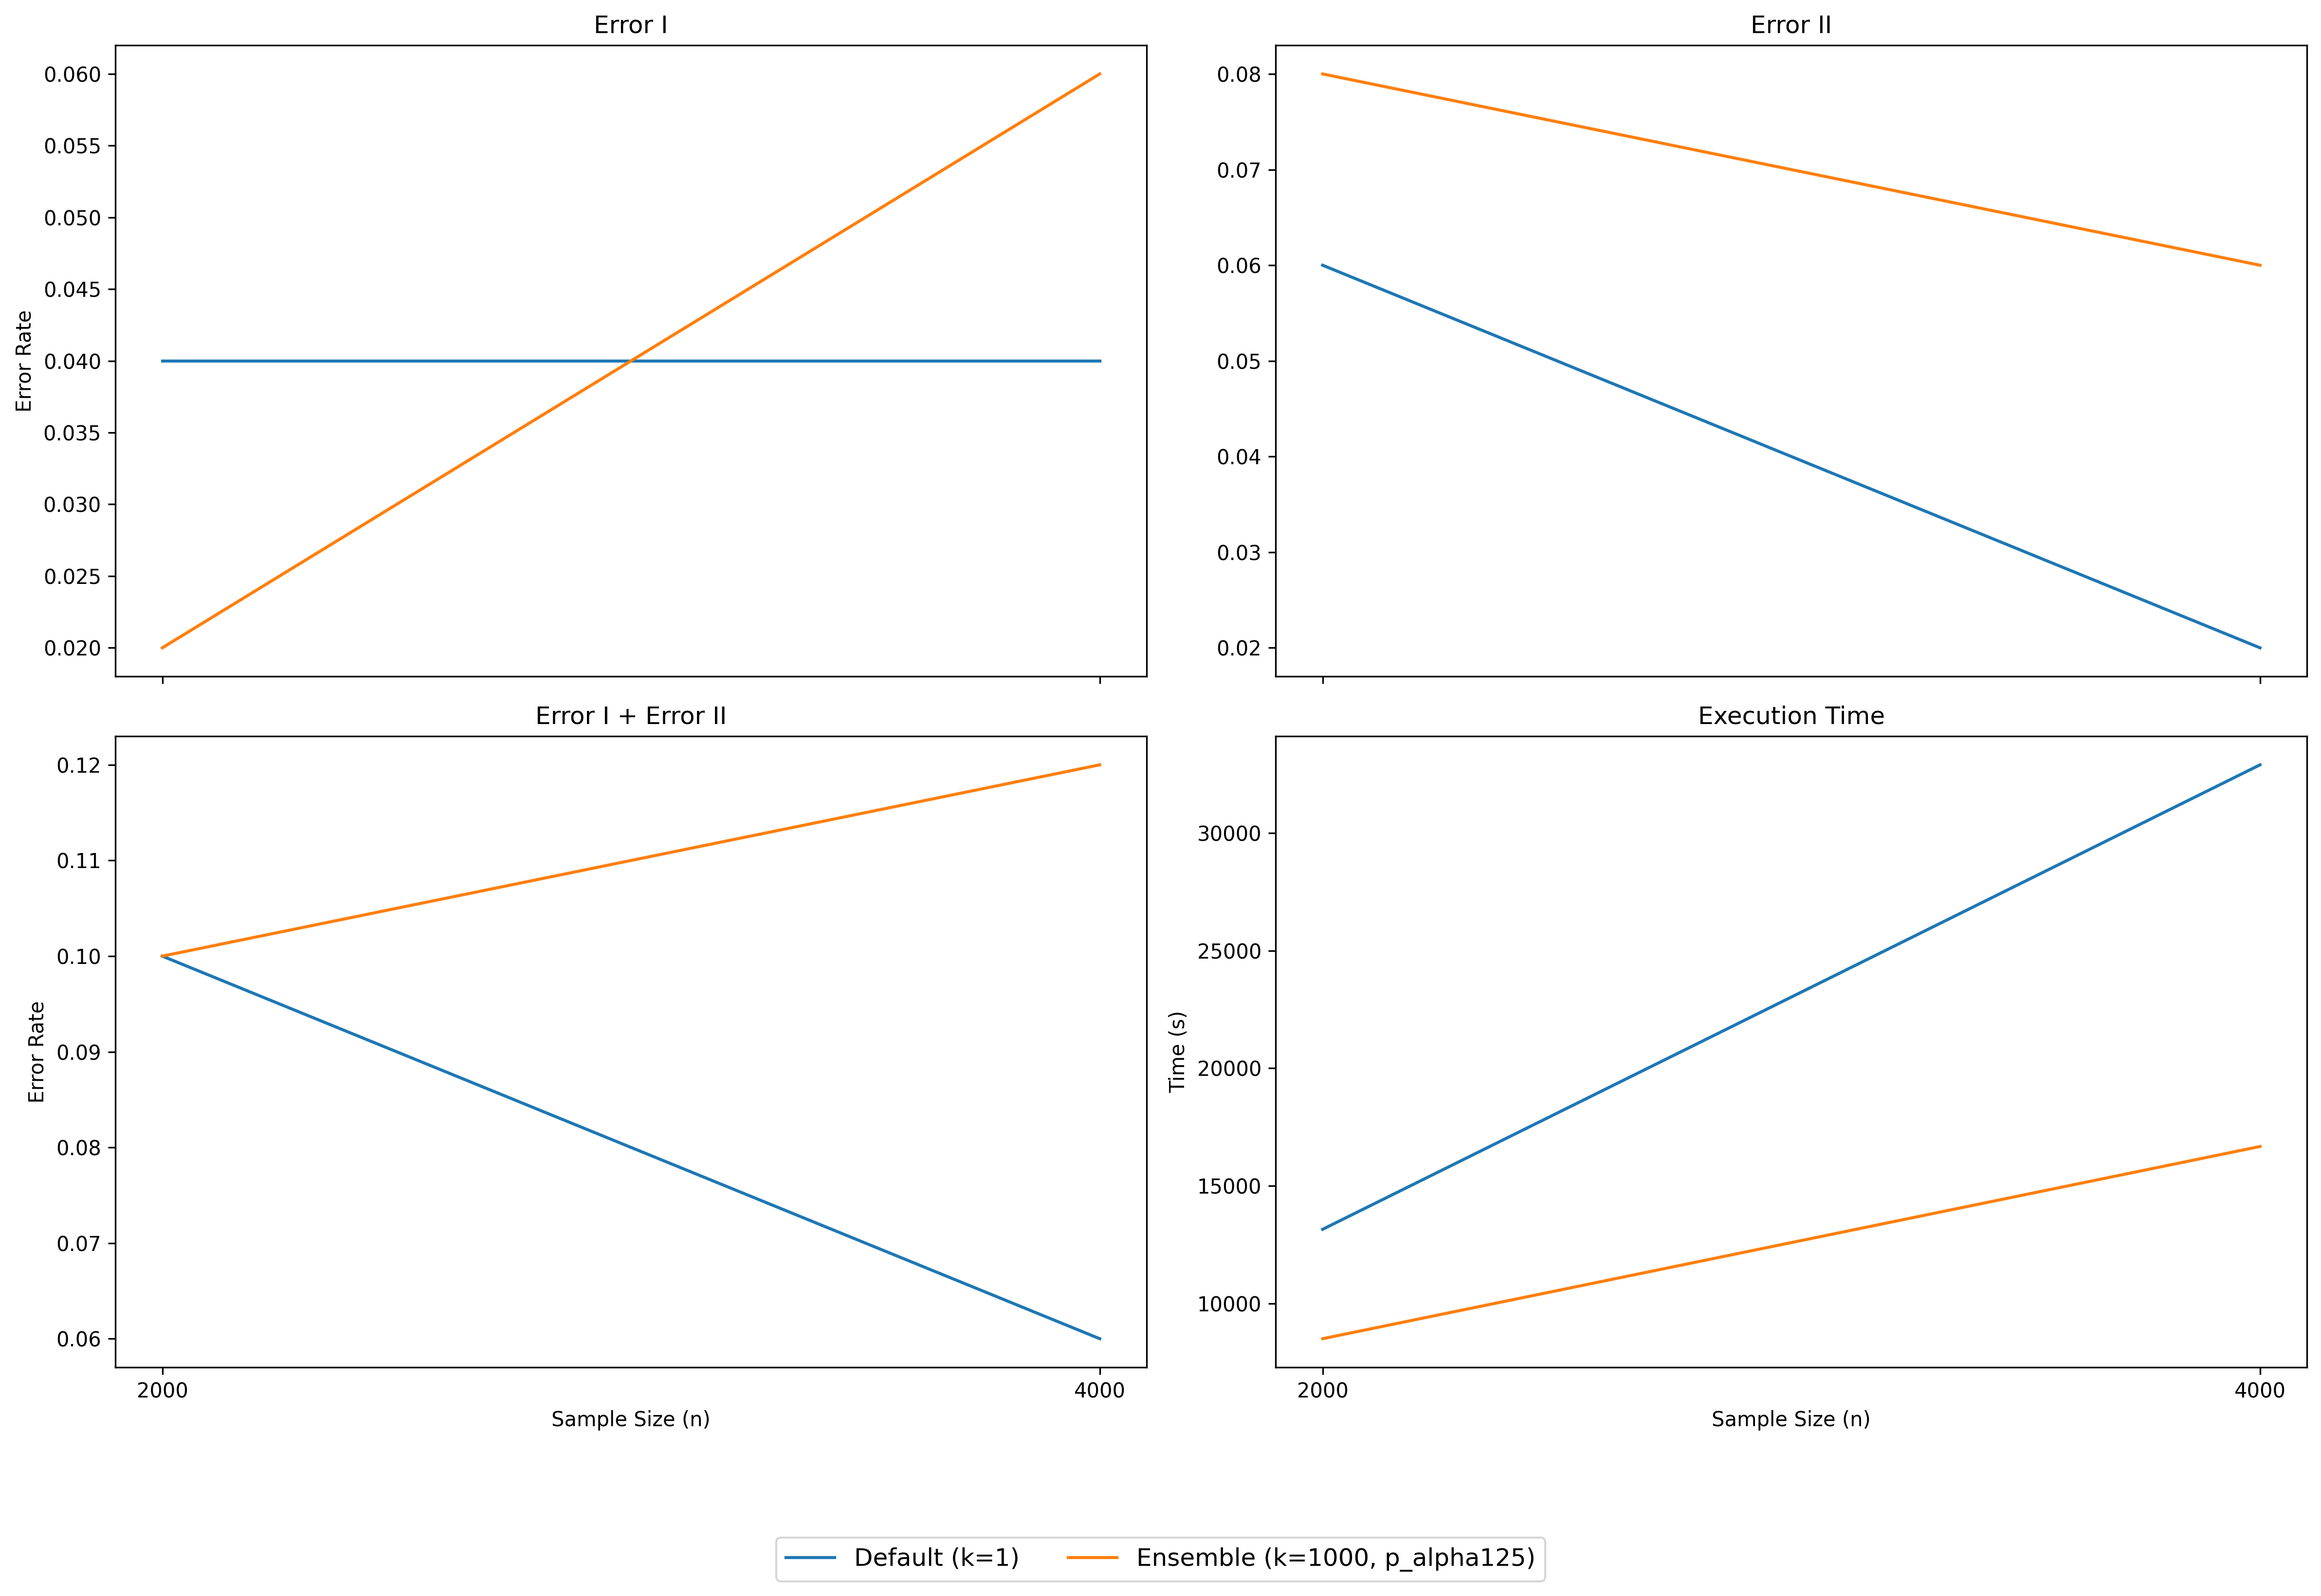

[[[0.04, 0.04], [0.06, 0.02], [13149.115720272064, 32908.68330359459]],
 [[0.02, 0.06], [0.08, 0.06], [8495.79511642456, 16672.763330936432]]]

In [2]:
n_list = [2000, 4000]
ensembles = [(p_alpha125, 1), (p_alpha125, 1000)]
t = 50
cit = cmiknn
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=5,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results